# Analyze the outflow of bank customers project 

## Description

In a regional bank, the outflow has dramatically increased lately, this is starting to become a serious problem. The marketing department commissioned a study.

**Goals:**
- analyze bank customers
- identify segments of customers who tend to leave the bank

**Tasks:**
- conduct an exploratory analysis, including the study of correlations and client profiles
- select not small, but compact high-precision segments, prioritize them
- test statistical hypotheses:

     *one. Hypothesis of income difference between those customers who left and those who stayed.*

     *2. Hypothesis of equal shares of departing and remaining customers in specific cities where there are bank branches*

- draw conclusions about which features strategically affect churn and what values or intervals of these features are associated with churn
- give specific recommendations for activities in priority segments
- prepare a presentation report with all the key points for the marketing department

## Description of Data

`userid` - user ID,

`score` — credit scoring scores,

`city` — city,

`gender` - gender,

`age` - age,

`equity` - approximate value of the client's property,

`balance` — account balance,

`products` - the number of products used by the client,

`credit_card` - whether there is a credit card,

`last_activity` - whether the client was active recently,

`est_salary` — client's salary,

`churn` - leaves or not.

## Presentation (pdf)

1. Construct a chart that reflects the number of customers depending on the number of products used.
2. Add an indicator of the percentage of customers who have left.
3. Add a dashboard filter for the city.



[Research Presentation](https://drive.google.com/file/d/1RKAv8qEEzXlwOUnVrc3FvUx8F62KWYUF/view?usp=share_link)

## Dashboard

### Dashboard description

1. Construct a chart that reflects the number of customers depending on the number of products used.
2. Add an indicator of the percentage of customers who have left.
3. Add a dashboard filter for the city.

[Dashboard - the number of customers depending on the number of products used](https://public.tableau.com/app/profile/yuriy7350/viz/banks_churn/Dashboard1)

## Open and examine general information about the data

In [ ]:
! gdown -- 1mKu-ZQv3rcgKBJiGN_zef-AZpTfNEhS8

Downloading...
From: https://drive.google.com/uc?id=1mKu-ZQv3rcgKBJiGN_zef-AZpTfNEhS8
To: /content/bank_scrooge.csv
100% 646k/646k [00:00<00:00, 74.6MB/s]


In [ ]:
%%capture
# install phik (if not installed yet)
import sys

!"{sys.executable}" -m pip install phik

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
import plotly.graph_objects as go
import numpy as np
import pylab 
import math as mth
#from datetime import datetime, timedelta

from scipy import stats as st
#from scipy.stats import mode

from pandas.plotting import register_matplotlib_converters

import phik
from phik.report import plot_correlation_matrix
from phik import report

pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.max_colwidth', None)

In [ ]:
try:
    path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F"
    df = pd.read_csv(path)
except:
    df = pd.read_csv('/content/bank_scrooge.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            10000 non-null  int64  
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


In [ ]:
df.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25,1,"59,214.82",2,0,1,"75,719.14",1
1,146556,861.00,Рыбинск,Ж,37,5,"850,594.33",3,1,0,"86,621.77",0
2,120722,892.00,Рыбинск,Ж,30,0,NaN,1,1,1,"107,683.34",0
3,225363,866.00,Ярославль,Ж,51,5,"1,524,746.26",2,0,1,"174,423.53",1
4,157978,730.00,Ярославль,М,34,5,174.00,1,1,0,"67,353.16",1


The dataset opened without comment. Column types are fine.

## Perform data preprocessing

Correct the names in the columns to the correct ones

In [ ]:
df.columns = df.columns.str.lower()

Examining duplicates

In [ ]:
df.duplicated().sum()

1

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

Let's do one more check. Let's look at duplicates by `userid` columns. `city`, `gender`, `age` .

In [ ]:
len(df[df.duplicated(subset=['userid', 'city', 'gender', 'age'])==True])

16

In [ ]:
users_duplicated = df[df.duplicated(subset=['userid', 'city', 'gender', 'age'])==True]['userid'].tolist()


In [ ]:
df.query('userid in @users_duplicated').sort_values(['userid'])

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3668,185829,925.00,Ярославль,М,40,0,NaN,1,1,0,"228,305.64",0
9632,185829,927.00,Ярославль,М,40,0,NaN,1,1,0,"231,254.86",0
9380,187459,894.00,Рыбинск,М,48,0,NaN,1,1,0,"178,012.28",0
4720,187459,895.00,Рыбинск,М,48,0,NaN,1,1,0,"180,887.50",0
918,187635,918.00,Ярославль,Ж,44,0,NaN,1,1,1,"162,497.52",0
2165,187635,692.00,Ярославль,Ж,44,0,NaN,1,1,1,"160,368.82",0
1181,198635,896.00,Ярославль,Ж,32,0,NaN,1,1,1,"170,866.01",0
8015,198635,670.00,Ярославль,Ж,32,0,NaN,1,1,1,"168,699.33",0
9301,202983,942.00,Ростов,Ж,39,0,NaN,1,1,1,"163,804.73",0
8897,202983,941.00,Ростов,Ж,39,0,NaN,1,0,1,"159,348.84",0


An interesting picture. 16 clients have backup clients. They have the same id, city, gender, age. The amounts on the accounts, salaries and ratings are different. Perhaps the errors are caused by incorrect updating of the data, and past records are simply not deleted. It's good that almost all backup clients are not going to leave, that is, they are in one of the two key groups in our study. But clients with id 227795 from Rybinsk - one leaves, the second does not. We will exclude it from further research so that they do not give errors when testing statistical hypotheses.

In [ ]:
df = df.loc[df['userid'] != 227795].copy()

In [ ]:
len(df[df.duplicated(subset=['userid', 'city', 'gender', 'age'])==True]) / len(df) * 100

0.15004501350405122

Even if there are indeed duplicates in the dataframe, which we are not sure about and certainly cannot know which of the two lines is correct, there are only 0.15% of them. We decide to leave it as it is.

Let's check that with duplicate id?

In [ ]:
df.query('userid not in @users_duplicated')\
    [df.query('userid not in @users_duplicated')\
     .duplicated(subset=['userid'],keep=False)]\
     .sort_values(['userid'])

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.00,Ярославль,Ж,55,1,"362,756.49",3,0,1,"175,920.48",1
7694,116540,887.00,Ярославль,Ж,38,0,NaN,1,0,1,"119,247.61",0
7542,117943,880.00,Ярославль,Ж,40,0,NaN,1,1,0,"137,718.93",0
4866,117943,855.00,Рыбинск,Ж,32,6,"1,036,832.93",4,1,1,"107,792.71",1
5896,120258,905.00,Ярославль,М,30,0,NaN,1,1,1,"146,427.96",0
...,...,...,...,...,...,...,...,...,...,...,...,...
2302,220816,934.00,Ярославль,Ж,74,5,"1,294,285.39",3,1,0,"95,606.80",0
2597,226719,990.00,Ярославль,М,37,4,"14,648,692.14",2,0,0,"934,412.61",1
4216,226719,903.00,Ярославль,Ж,63,0,NaN,1,1,0,"138,582.58",0
6457,228075,839.00,Ярославль,М,39,5,"507,199.85",3,0,1,"85,195.80",0


Another 112 people have the same id, but they are still different people.

Explore gaps.

In [ ]:
df.isna().mean()

userid          0.00
score           0.00
city            0.00
gender          0.00
age             0.00
equity          0.00
balance         0.23
products        0.00
credit_card     0.00
last_activity   0.00
est_salary      0.00
churn           0.00
dtype: float64

In the balance of the pass account for 23% of clients. Almost a quarter. Let's try to establish this nature of gaps. To begin with, let's compare the histograms of the columns of datasets with the histograms of the columns of the same columns, but where inclusions are involved, in which, in general, the "balance" is worth the gap.

Text(0.5, 1.0, 'Histograms of the entire dataset')

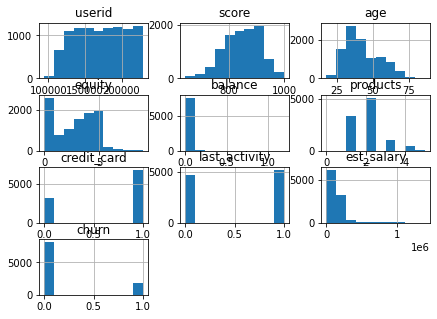

In [ ]:
df.hist(figsize=(7, 5))
pylab.title ("Histograms of the entire dataset")

Text(0.5, 1.0, 'Row histograms with a gap in the "balance" column')

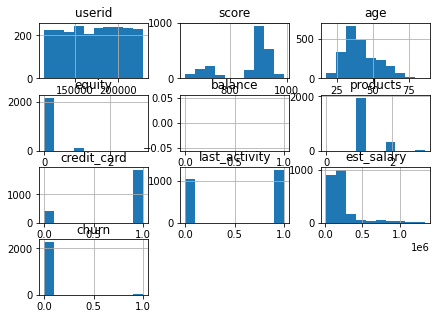

In [ ]:
df[df['balance'].isnull()].hist(figsize=(7, 5))
pylab.title ('Row histograms with a gap in the "balance" column')

A superficial visual comparison of the two sets of histograms shows strong differences in the `score`, `equity`, `products`, `est_salary` columns. Let's consider them in more detail, coloring the lines in which there are gaps in the `balance` column.

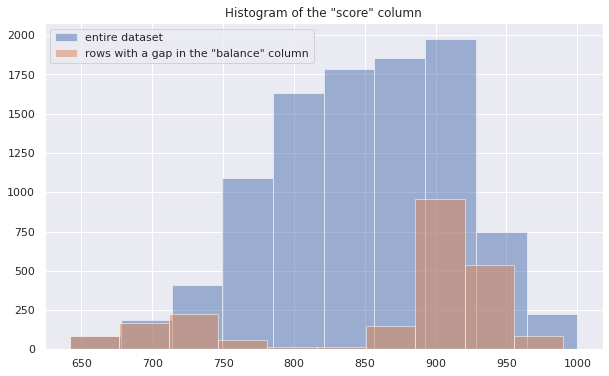

In [ ]:
x = df['score']
y = df[df['balance'].isnull()]['score']

sns.set(rc = {'figure.figsize':(10, 6)})

plt.hist(x, alpha=0.5, label='entire dataset')
plt.hist(y, alpha=0.5, label='rows with a gap in the "balance" column')

plt.title('Histogram of the "score" column')
plt.legend(loc='upper left')
plt.show()

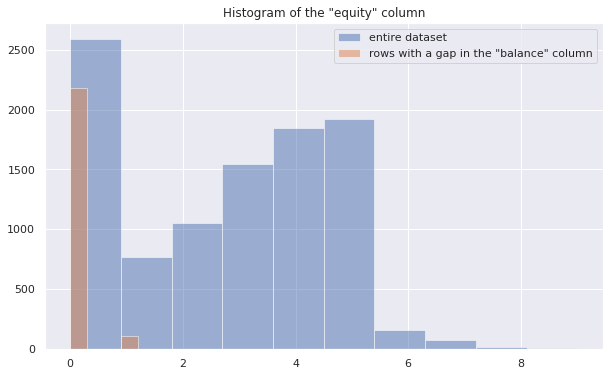

In [ ]:
x = df['equity']
y = df[df['balance'].isnull()]['equity']

sns.set(rc = {'figure.figsize':(10, 6)})

plt.hist(x, alpha=0.5, label='entire dataset')
plt.hist(y, alpha=0.5, label='rows with a gap in the "balance" column')

plt.title('Histogram of the "equity" column')
plt.legend(loc='upper right')
plt.show()

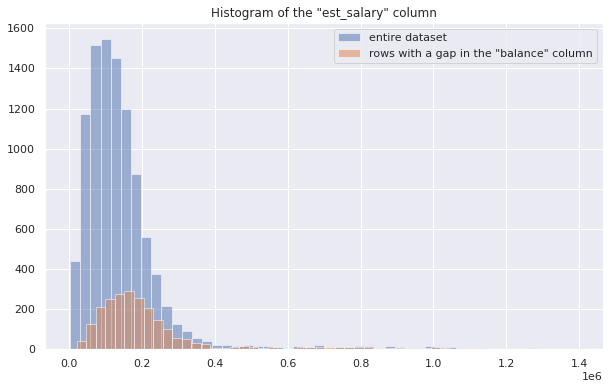

In [ ]:
x = df['est_salary']
y = df[df['balance'].isnull()]['est_salary']

sns.set(rc = {'figure.figsize':(10, 6)})

plt.hist(x, alpha=0.5, bins=50, label='entire dataset')
plt.hist(y, alpha=0.5, bins=50, label='rows with a gap in the "balance" column')

plt.title('Histogram of the "est_salary" column')
plt.legend(loc='upper right')
plt.show()

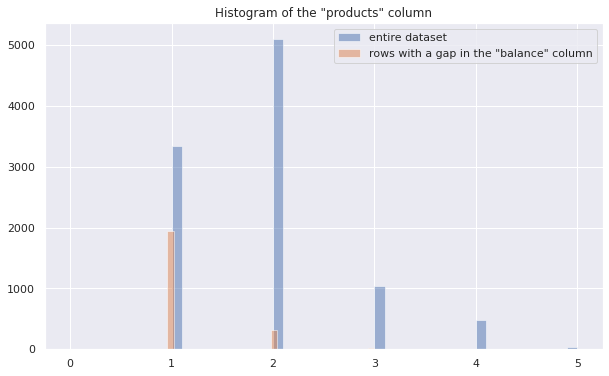

In [ ]:
x = df['products']
y = df[df['balance'].isnull()]['products']

sns.set(rc = {'figure.figsize':(10, 6)})

plt.hist(x, alpha=0.5, bins=50, label='entire dataset')
plt.hist(y, alpha=0.5, bins=50, label='rows with a gap in the "balance" column')

plt.title('Histogram of the "products" column')
plt.legend(loc='upper right')
plt.show()

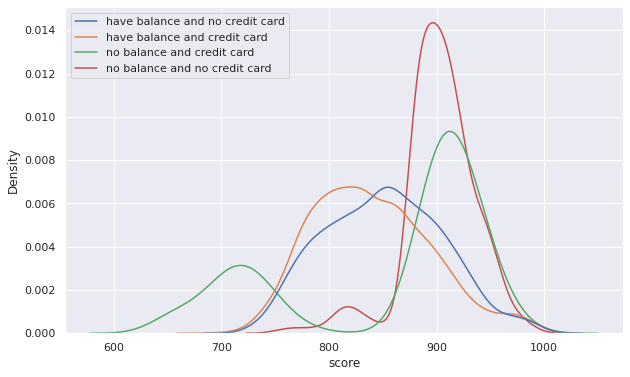

In [ ]:
nan_bal_cc_groups = df.balance.isna().map({False:"have balance ",True:"no balance "})\
                  + df.credit_card.map({1:"and credit card",0:"and no credit card"})

sns.kdeplot(data=df,hue=nan_bal_cc_groups,x='score',common_norm=False);

Many clients who have gaps in the account balance column have low credit scores, one banking product, and most of these clients have a zero property score and no credit card. It is possible that their accounts have minimal amounts that were not taken into account when uploading, as a result of which gaps appeared in the corresponding column. Or there is an error during upload. We consider it necessary to leave the gaps unchanged. This column will not participate in the study of statistical hypotheses.

Examining abnormal values in the `products` column

In [ ]:
df['products'].value_counts()

2    5107
1    3339
3    1046
4     474
5      30
0       1
Name: products, dtype: int64

The marketing department reported that customers have at least one banking product, therefore, zero products is an anomaly, get rid of it.

In [ ]:
df = df.loc[df['products'] != 0].copy()

Convert the `churn` column to readable (in a new column)

In [ ]:
df['churn_new'] = df['churn'].apply(lambda x: 'уходит' if x == 1 else 'не уходит').copy() 

Let's encode the column with categorical ordered data `gender` and categorical unordered data `city` as numbers. This is necessary so that you can conduct a full-fledged study, calculate the mean, median and mode for all indicators. The encoded data will be placed in new columns.

In [ ]:
df['gender_new'] = df['gender'].apply(lambda x: 1 if x == "М" else 0).copy() 

To recode the `city` column, we use the one-hot encoding type.

In [ ]:
df = pd.concat((df,pd.get_dummies(df.city)),1)

<ipython-input-29-8a026df23e02>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  df = pd.concat((df,pd.get_dummies(df.city)),1)


Data preprocessing is completed. Types are normal, duplicates are removed, anomalous values too, column names are made correct, the nature of the gaps is assumed (the minimum balance on the account that was not taken into account when uploading) and decided to leave them unchanged, the columns with categorical values are coded.
Let's start the analysis.

## EDA

### Examining columns with quantitative data

In [ ]:
df.describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_new,Ростов,Рыбинск,Ярославль
count,"9,996.00","9,996.00","9,996.00","9,996.00","7,703.00","9,996.00","9,996.00","9,996.00","9,996.00","9,996.00","9,996.00","9,996.00","9,996.00","9,996.00"
mean,"171,808.90",848.68,42.84,2.63,"827,921.30",1.87,0.68,0.52,"147,864.80",0.18,0.50,0.14,0.27,0.59
std,"33,703.50",65.45,12.12,1.98,"1,980,855.59",0.80,0.47,0.50,"139,389.87",0.39,0.50,0.35,0.44,0.49
min,"94,561.00",642.00,18.00,0.00,0.00,1.00,0.00,0.00,"2,546.30",0.00,0.00,0.00,0.00,0.00
25%,"142,810.25",802.00,34.00,0.00,"295,498.98",1.00,0.00,0.00,"75,251.90",0.00,0.00,0.00,0.00,0.00
50%,"172,728.00",853.00,40.00,3.00,"524,295.33",2.00,1.00,1.00,"119,686.48",0.00,1.00,0.00,0.00,1.00
75%,"201,260.25",900.00,51.00,4.00,"980,801.49",2.00,1.00,1.00,"174,500.54",0.00,1.00,0.00,1.00,1.00
max,"229,145.00","1,000.00",86.00,9.00,"119,113,552.01",5.00,1.00,1.00,"1,395,064.45",1.00,1.00,1.00,1.00,1.00


Inspired by the maximum expected salary and account balance. Also of interest is the client with the highest credit scoring score and the oldest client. Let's find them.

In [ ]:
print('Account balance record holder:')
display(df.loc[df['balance'] == df.describe().loc['max', 'balance']])
print()
print('Record holder for expected salary:')
display(df.loc[df['est_salary'] == df.describe().loc['max', 'est_salary']])
print()
print('Credit scoring record holders:')
display(df.loc[df['score'] == df.describe().loc['max', 'score']])
print()
print('Age record holder:')
display(df.loc[df['age'] == df.describe().loc['max', 'age']])

Account balance record holder:


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,churn_new,gender_new,Ростов,Рыбинск,Ярославль
7597,156149,900.00,Ярославль,М,62,5,"119,113,552.01",2,1,1,"138,041.31",0,не уходит,1,0,0,1



Record holder for expected salary:


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,churn_new,gender_new,Ростов,Рыбинск,Ярославль
4005,163640,912.00,Ярославль,М,35,4,"15,624,095.80",2,0,1,"1,395,064.45",0,не уходит,1,0,0,1



Credit scoring record holders:


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,churn_new,gender_new,Ростов,Рыбинск,Ярославль
125,227092,"1,000.00",Ярославль,М,32,5,"19,757,180.85",2,1,1,"1,024,626.50",0,не уходит,1,0,0,1
1027,119793,"1,000.00",Ярославль,М,50,5,"12,909,691.02",1,1,0,"1,253,653.40",0,не уходит,1,0,0,1
3348,193457,"1,000.00",Ярославль,Ж,34,4,"10,885,990.87",4,1,1,"799,847.28",0,не уходит,0,0,0,1
4721,228786,"1,000.00",Ярославль,М,45,5,"29,008,931.92",2,0,1,"811,804.54",0,не уходит,1,0,0,1
6948,137434,"1,000.00",Ярославль,М,37,4,"20,906,155.51",2,1,1,"947,606.60",1,уходит,1,0,0,1
8484,221720,"1,000.00",Ярославль,Ж,35,5,"21,549,943.63",2,0,0,"1,051,902.65",0,не уходит,0,0,0,1



Age record holder:


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,churn_new,gender_new,Ростов,Рыбинск,Ярославль
9176,116838,777.00,Ярославль,Ж,86,3,"772,929.83",1,1,1,"40,877.18",0,не уходит,0,0,0,1
9413,135210,921.00,Ярославль,Ж,86,0,NaN,1,0,1,"36,185.91",0,не уходит,0,0,0,1


Here they are - record holders. All from the regional center - Yaroslavl. I am glad that only one of them was going to leave, the one who is in the group of leaders in credit scoring. There are six in this group, and everything is in order with the account balance and salary.

Let's look at emissions.

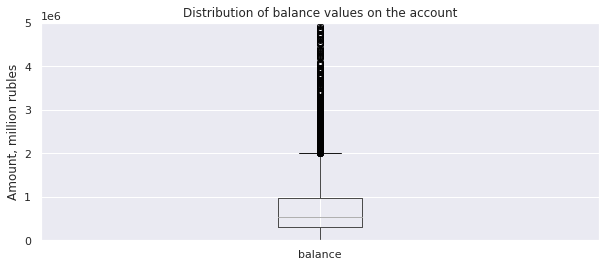

In [ ]:
df[['balance']].boxplot(figsize=(10, 4))

plt.ylim([0,5000000])
plt.title('Distribution of balance values on the account')
plt.ylabel('Amount, million rubles');

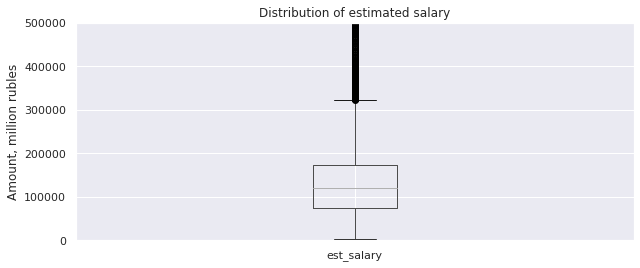

In [ ]:
df[['est_salary']].boxplot(figsize=(10, 4))

plt.ylim([0,500000])
plt.title('Distribution of estimated salary')
plt.ylabel('Amount, million rubles');

Significant outliers in balance sheet and wages. And it pleases. This means that the bank has a lot of rich clients who are out of the picture, but it is important that they are the bank's clients. We will take this into account in further research.

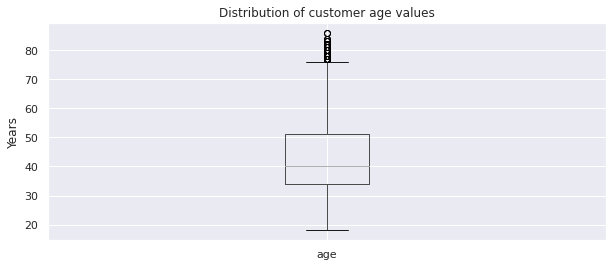

In [ ]:
df[['age']].boxplot(figsize=(10, 4))

plt.title('Distribution of customer age values')
plt.ylabel('Years');

The right quartile rests on the value of 75 years - up to this age there are active bank customers and you can work with them. Median age - 40. Client core - citizens aged 35-50.

### Exploring columns with categorical data

In [ ]:
df['city'].value_counts(normalize = True)

Ярославль   0.59
Рыбинск     0.27
Ростов      0.14
Name: city, dtype: float64

One can rejoice at wages in the Yaroslavl region, judging by this date.

In [ ]:
df['gender'].value_counts(normalize = True)

М   0.50
Ж   0.50
Name: gender, dtype: float64

The ideal ratio of clients by gender. 50/50 males and females.

In [ ]:
df['credit_card'].value_counts(normalize = True)

1   0.68
0   0.32
Name: credit_card, dtype: float64

A third of customers do not have bank credit cards.

In [ ]:
fig = px.bar(df['equity'].value_counts(normalize=True).round(2), text = 'value')

fig.update_layout(width=900, 
                  height=400,
                  title='Percentage of customers based on a rough estimate of their property',
                  xaxis_title='Grade (1-9)',
                  yaxis_title='Share')
fig.show() 

The bank does not have customers with a property assessment of 8 or 9 at all. A quarter of customers have a score of 0. The backbone - customers with a property score of 4 and 5 (19% of all customers each).

Well, the most interesting thing at this stage is how many of them, customers who want to leave?

In [ ]:
churn_total = df['churn_new'].value_counts().reset_index().sort_values(by='index', ascending = False)
churn_total['Share of the total number of clients, %'] = churn_total['churn_new'] / churn_total['churn_new'].sum() * 100
churn_total = churn_total.rename(columns={'index': 'Category', 'churn_new': 'Amount of customers'})
churn_total

,Category,Amount of customers,"Share of the total number of clients, %"
1,уходит,1820,18.21
0,не уходит,8176,81.79


Over 18%, 1800 people are going to leave! Let's get to know these people better, as well as those who remain.

### Customer portraits based on central feature trends

Let's compare the portraits of departing and remaining customers, compose the central tendencies of characteristics for some and others. Let's evaluate the differences where possible.

`score`, `age` - count by median to protect against outliers.

`balance`, `est_salary` - we calculate by average. We know that there are strong outliers of large values, but these are rich clients.

`credit_card`, `gender_new`, `last_activity`, `Rostov`, `Rybinsk`, `Yaroslavl` - also on average. These columns contain binary values. The average will show the proportion of customers for whom this indicator is equal to one.

`equity`, `products` - by average. These are ordinal data, they have a clear order, the distribution is uneven.

In [ ]:
churn_1 = df[df['churn'] == 1]
churn_0 = df[df['churn'] != 1]

In [ ]:
churn_1 = churn_1.agg({'score' : 'median', 'age' : 'median',\
             'balance' : 'mean', 'est_salary' : 'mean',
             'credit_card' : 'mean', 'gender_new' : 'mean',
             'last_activity' : 'mean', 'Ростов': 'mean',\
             'Рыбинск': 'mean', 'Ярославль': 'mean',\
             'equity': 'mean', 'products': 'mean'})\
             .reset_index()

In [ ]:
churn_0 = churn_0.agg({'score' : 'median', 'age' : 'median',\
             'balance' : 'mean', 'est_salary' : 'mean',
             'credit_card' : 'mean', 'gender_new' : 'mean',
             'last_activity' : 'mean', 'Ростов': 'mean',\
             'Рыбинск': 'mean', 'Ярославль': 'mean',\
             'equity': 'mean', 'products': 'mean'})\
             .reset_index()

In [ ]:
churn_total = pd.merge(churn_1, churn_0, on='index')

In [ ]:
churn_total = pd.merge(churn_1, churn_0, on='index')
churn_total['% of changes'] = ((churn_total['0_x'] / churn_total['0_y'] *100)-100)

churn_total = churn_total.sort_values(by='% of changes', ascending=False)
churn_total = churn_total\
.rename(columns = {'index': 'Column', '0_x': 'Central Feature Trend of leaving costomers', '0_y':'Central Feature Trend of remaining costomers'})

churn_total

,Column,Central Feature Trend of leaving costomers,Central Feature Trend of remaining costomers,% of changes
10,equity,3.76,2.37,58.53
2,balance,"1,133,719.46","734,132.82",54.43
6,last_activity,0.70,0.48,45.39
5,gender_new,0.65,0.47,39.05
11,products,2.38,1.76,35.06
9,Ярославль,0.62,0.59,5.26
7,Ростов,0.15,0.14,4.00
0,score,866.00,848.00,2.12
3,est_salary,"148,293.00","147,769.48",0.35
1,age,39.00,40.00,-2.50


Sort the columns by percent change in central trends where possible. In this case, it does not matter whether this percentage is up or down, so we use the `abs()` method.

In [ ]:
churn_total = churn_total.loc[churn_total['% of changes'] != 'изменений по моде нет']
churn_total = churn_total.loc[churn_total['% of changes'] != 'изменения по моде есть']

churn_total['% of changes'] = churn_total['% of changes'].abs().sort_values()

churn_total = churn_total.sort_values(by='% of changes', ascending=False)

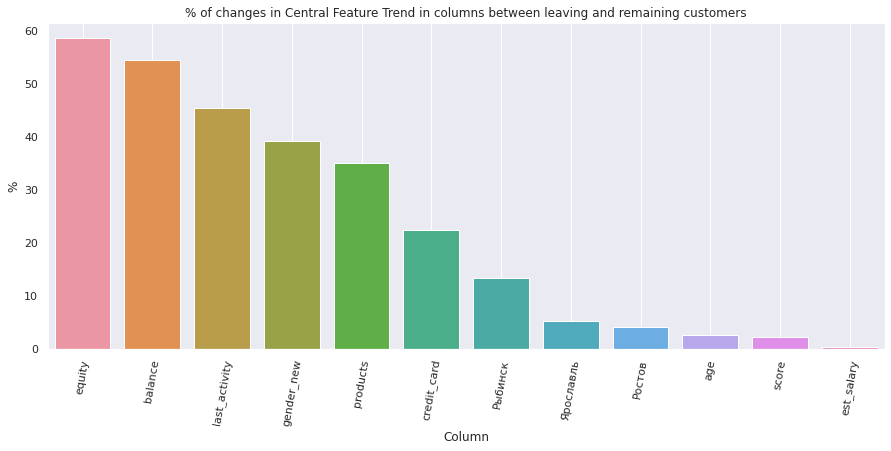

In [ ]:
plt.figure(figsize=(15, 6))

sns.barplot(x='Column', y='% of changes', data=churn_total)

plt.title('% of changes in Central Feature Trend in columns between leaving and remaining customers')
plt.xlabel('Column')
plt.ylabel('%')

plt.grid()
plt.xticks(rotation=80)
plt.show()

Here are the first clues. It's too early to draw firm conclusions, this graph will help us prioritize when checking the influence of column characteristics on the probability of leaving. Let's get started.

## Relationship analysis

For convenience, let's create a function.

In [ ]:
def influence_graph(colomn, bins, title, xlabel):
    
    plt.figure(figsize=(18, 6))
    sns.histplot(x=colomn, data=df, kde=True, hue='churn_new', bins=bins, stat='density', common_norm = False)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Density')
    plt.show()

### Influence of customer ownership score on exit probability (no change in Central Feature Trends in mode)

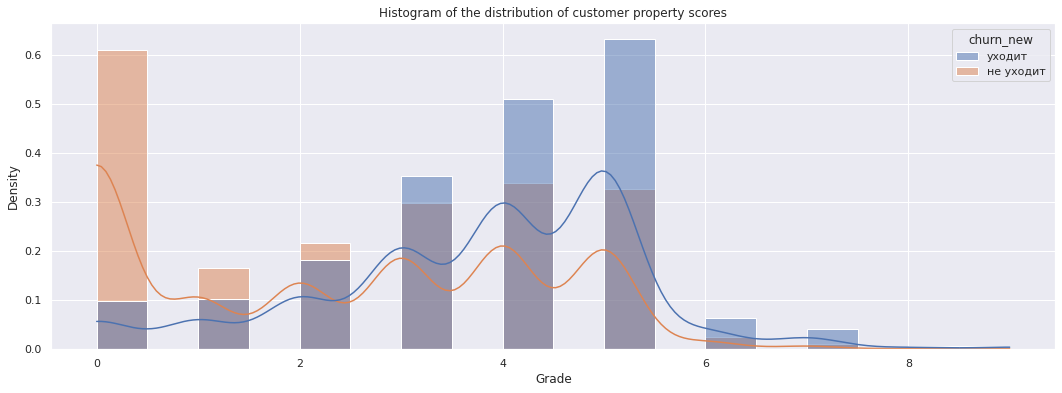

In [ ]:
influence_graph('equity', 18, 'Histogram of the distribution of customer property scores', 'Grade')

`equity` - customers leave with a rating of 3, 4, 5, 6, 7.

### Influence of account balance on exit probability

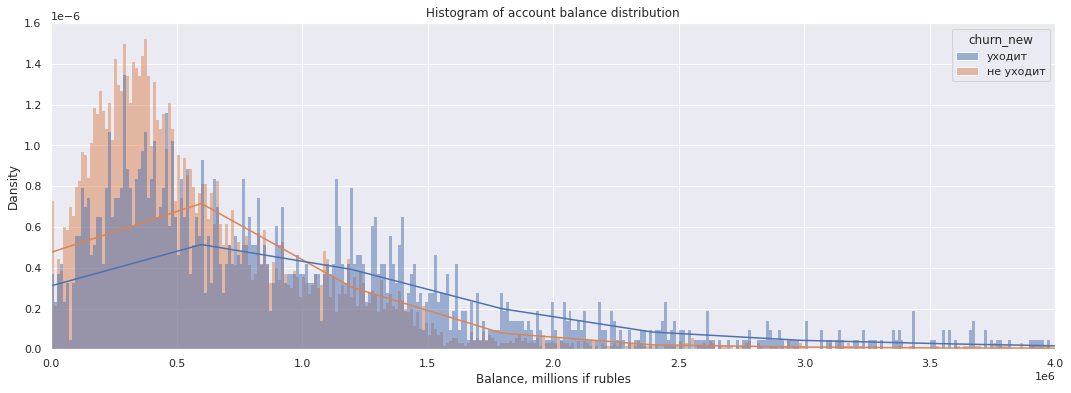

In [ ]:
plt.figure(figsize=(18, 6))

sns.histplot(x='balance', data=df, kde=True, hue='churn_new', bins=10000, stat='density', common_norm = False)

plt.xlim(0, 4000000)
plt.title('Histogram of account balance distribution')
plt.xlabel('Balance, millions if rubles')
plt.ylabel('Dansity')
plt.show();

`balance` - a fat tail of those who leave, who keep amounts from 700,000 rubles on their accounts. There are noticeably fewer people remaining after this milestone, and these are valuable clients with money (represented as outliers on the distribution graph).

### Impact of last activity on exit probability

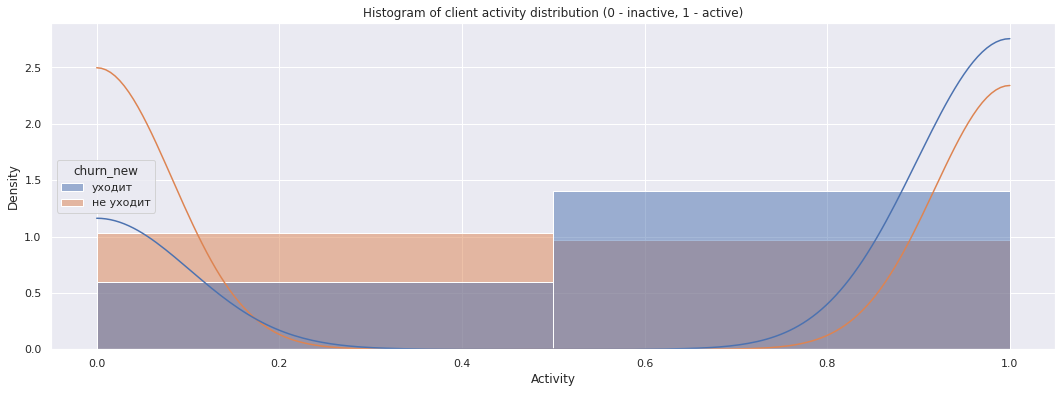

In [ ]:
influence_graph('last_activity', 2, 'Histogram of client activity distribution (0 - inactive, 1 - active)', 'Activity')

`last_activity` the density of active leaving is one third more than active remaining. Among inactive clients, the density of leaving is half as much.

### Influence of gender on the probability of leaving

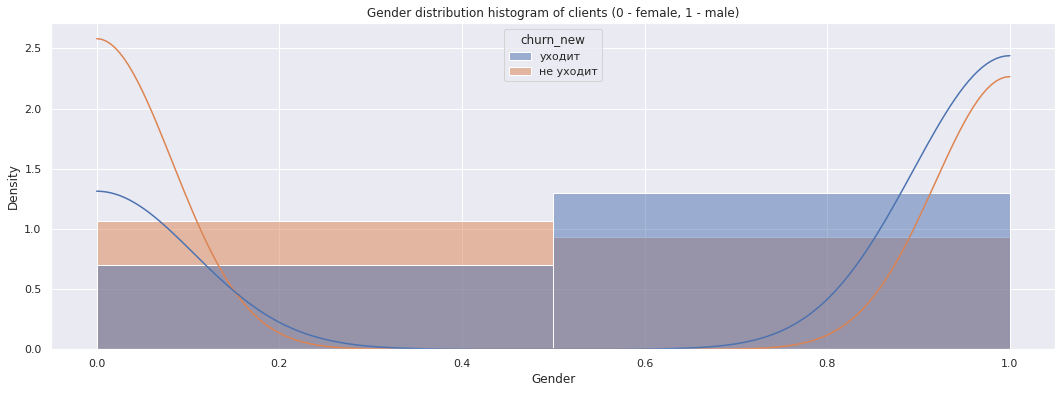

In [ ]:
influence_graph('gender_new', 2, 'Gender distribution histogram of clients (0 - female, 1 - male)', 'Gender')

`gender_new` males leave more often than females.

### Influence of the number of products visited by customers on the probability of leaving (there is a change in sources of attraction according to fashion)

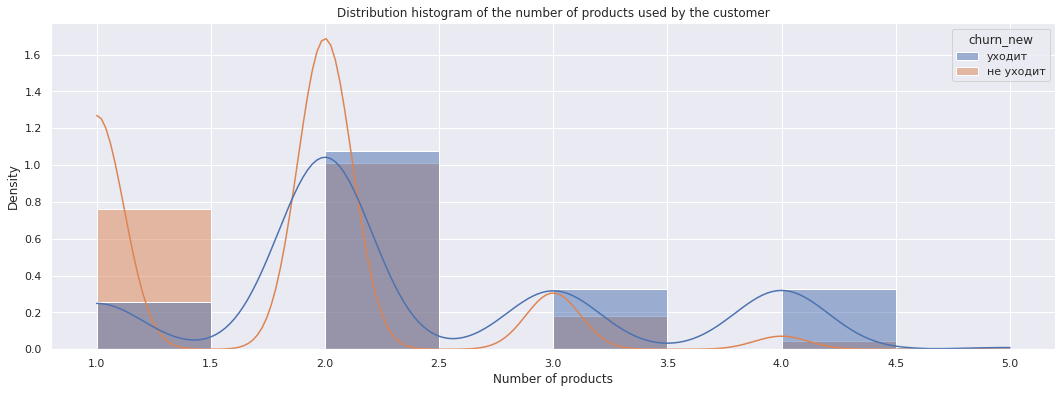

In [ ]:
influence_graph('products', 8, 'Distribution histogram of the number of products used by the customer', 'Number of products')

`products` - leaving customers have 2, 3, 4 products. Moreover, almost all customers who have 4 banking products are going to leave.

### Impact of having a credit card on the likelihood of leaving

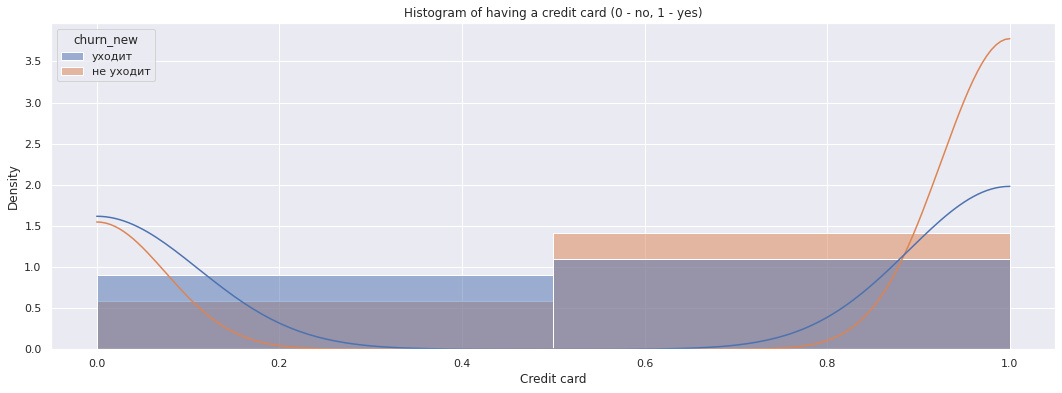

In [ ]:
influence_graph('credit_card', 2, 'Histogram of having a credit card (0 - no, 1 - yes)', 'Credit card')

`credit_card` customers with credit cards leave more often than customers without credit cards.

### The influence of age on the likelihood of leaving

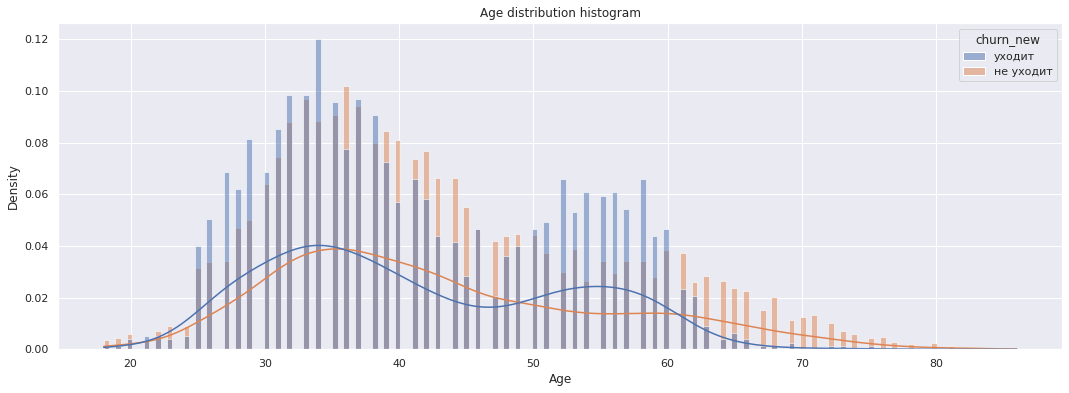

In [ ]:
influence_graph('age', 160, 'Age distribution histogram', 'Age')

`age` - clients aged 25-35 and 50-60 leave.

### Impact of scoring on exit probability

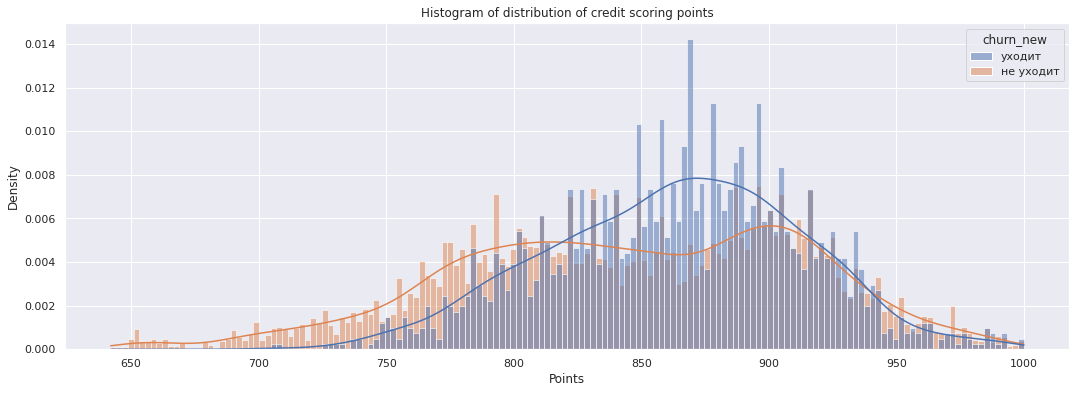

In [ ]:
influence_graph('score', 160, 'Histogram of distribution of credit scoring points', 'Points')

`score` - customers leave with a rating of 825-900.

### The impact of salary on the likelihood of leaving

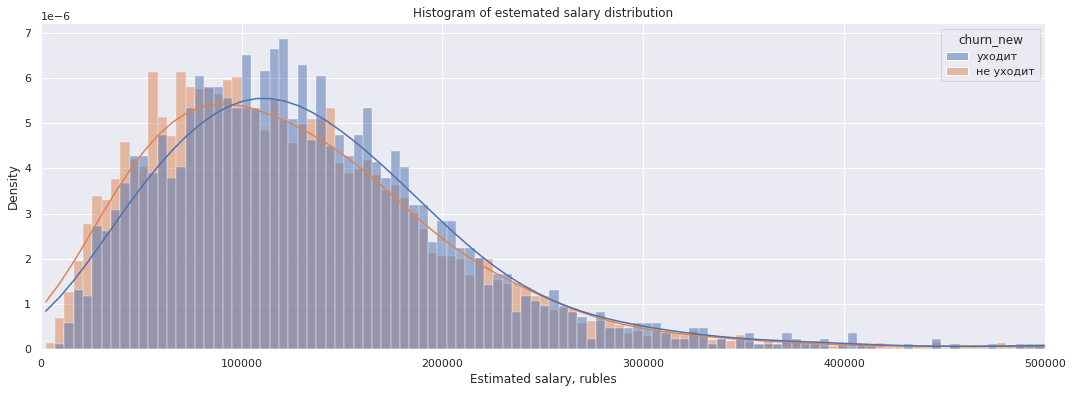

In [ ]:
plt.figure(figsize=(18, 6))

sns.histplot(x='est_salary', data=df, kde=True, hue='churn_new', bins=300, stat='density', common_norm = False)

plt.xlim(0, 500000)
plt.title('Histogram of estemated salary distribution')
plt.xlabel('Estimated salary, rubles')
plt.ylabel('Density')
plt.show();

`est_salary` - clients leave with an expected salary of 100,000-200,000 rubles.

### Influence of the city on the probability of leaving

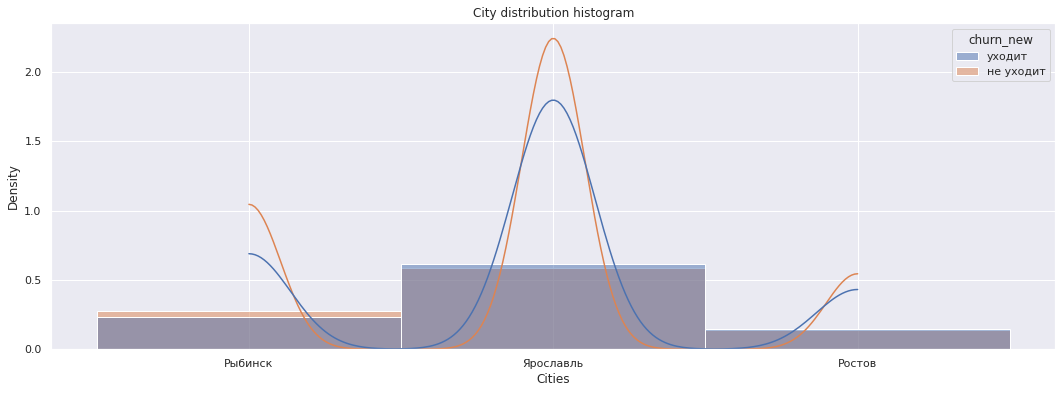

In [ ]:
influence_graph('city', 5, 'City distribution histogram', 'Cities')

`city_new` - leaving and remaining customers are almost evenly distributed across the three cities. Most of both are in Yaroslavl.

It seems that economically active customers who know what banking products are, actively use them, compare and choose the best are leaving. And something does not suit them in this bank. Clients with lower income, credit rating and asset scores are not very active. Opened an account, issued a credit card, and that's it.

## Carry out correlation analysis

In [ ]:
#interval_cols = ['score', 'age',	'equity',	'products']          
#phik_overview = df.phik_matrix(interval_cols=interval_cols)     
#phik_overview.round(2)

In [ ]:
phik_overview = df.phik_matrix()
phik_overview.round(2)

interval columns not set, guessing: ['userid', 'score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn', 'gender_new', 'Ростов', 'Рыбинск', 'Ярославль']


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,churn_new,gender_new,Ростов,Рыбинск,Ярославль
userid,1.00,0.06,0.03,0.06,0.00,0.07,0.03,0.10,0.04,0.07,0.00,0.14,0.14,0.06,0.04,0.00,0.01
score,0.06,1.00,0.09,0.07,0.04,0.53,0.17,0.42,0.21,0.05,0.40,0.23,0.23,0.07,0.09,0.03,0.09
city,0.03,0.09,1.00,0.01,0.09,0.07,0.04,0.13,0.08,0.03,0.17,0.02,0.02,0.01,1.00,1.00,1.00
gender,0.06,0.07,0.01,1.00,0.31,0.06,0.05,0.07,0.20,0.01,0.14,0.22,0.22,1.00,0.02,0.01,0.03
age,0.00,0.04,0.09,0.31,1.00,0.09,0.03,0.15,0.17,0.09,0.37,0.19,0.19,0.31,0.06,0.06,0.10
equity,0.07,0.53,0.07,0.06,0.09,1.00,0.00,0.59,0.22,0.05,0.29,0.35,0.35,0.06,0.07,0.00,0.06
balance,0.03,0.17,0.04,0.05,0.03,0.00,1.00,0.00,0.00,0.00,0.37,0.02,0.02,0.05,0.00,0.02,0.05
products,0.10,0.42,0.13,0.07,0.15,0.59,0.00,1.00,0.27,0.11,0.22,0.26,0.26,0.07,0.05,0.09,0.11
credit_card,0.04,0.21,0.08,0.20,0.17,0.22,0.00,0.27,1.00,0.05,0.04,0.20,0.20,0.20,0.15,0.08,0.18
last_activity,0.07,0.05,0.03,0.01,0.09,0.05,0.00,0.11,0.05,1.00,0.05,0.26,0.26,0.01,0.00,0.07,0.07


Let's build a hitmap based on the matrix.

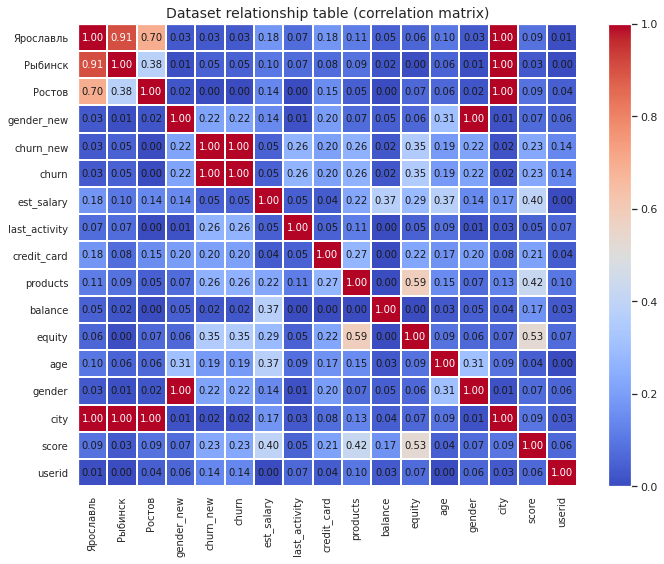

In [ ]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="coolwarm", 
                        title=r"Dataset relationship table (correlation matrix)", 
                        fontsize_factor=1, 
                        figsize=(10, 8))
plt.tight_layout()

Select the key column `churn` and sort it.

In [ ]:
values = phik_overview['churn'].round(2).sort_values().drop(['churn', 'churn_new']).to_numpy()
values.shape = (len(values), 1)

columns = np.array(['churn'])

index = phik_overview['churn'].round(2).sort_values().drop(['churn', 'churn_new']).reset_index()['index'].to_numpy()

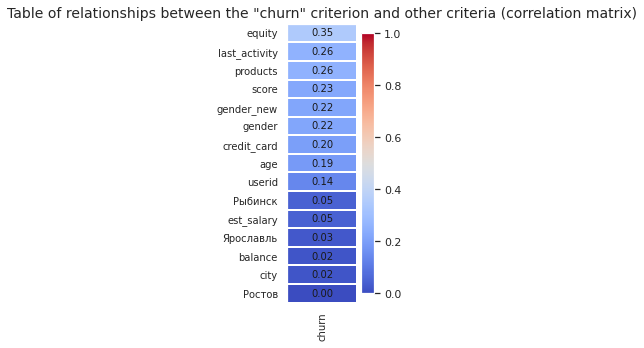

In [ ]:
plot_correlation_matrix(values, 
                        x_labels=columns, 
                        y_labels=index, 
                        vmin=0, vmax=1, color_map="coolwarm", 
                        title=r'Table of relationships between the "churn" criterion and other criteria (correlation matrix)', 
                        fontsize_factor=1)

plt.tight_layout()

According to the Chaddock scale, a strong correlation for `Yaroslavl` and `Rybinsk`, high for `Yaroslavl` and `Rostov`. There is a notable correlation between `score` credit scoring and `equity` real estate asset scores, as well as `equity` real estate asset scores and `products` number of bank products.

As for the correlation of the outgoing and remaining `churn` with other criteria, only moderate correlation with real estate asset `equity` scores.
No correlation was found between the impact of those leaving and staying on wages and the balance sheet with their emissions.

It's time to test the statistical hypotheses.

## Statistical hypotheses

### Hypothesis 1

At the beginning of the study, we found out that the id of customers even from the same city is repeated. Let's see how many customers overlap by id?

In [ ]:
df.groupby('churn').agg({'userid': 'nunique'}).sum()[0] - df['userid'].nunique()

49

In [ ]:
(df.groupby('churn').agg({'userid': 'nunique'}).sum()[0] - df['userid'].nunique()) / len(df) * 100

0.49019607843137253

49 id intersects. Half a percent. We decide to find and exclude these id from the test of statistic hypotheses for the purity of the experiment.

In [ ]:
user_1 = df.query('churn == 1').agg({'userid': 'unique'}) 
user_0 = df.query('churn != 1').agg({'userid': 'unique'}) 
 
user_duplicates = list(set(user_1[0]).intersection(set(user_0[0])))
test = df.query('userid != @user_duplicates').copy()

test.groupby('churn').agg({'userid': 'nunique'}).sum()[0] - test['userid'].nunique()

0

In [ ]:
test['churn'].value_counts(normalize=True)

0   0.82
1   0.18
Name: churn, dtype: float64

The difference between the groups is significant. Let's look at the distribution of values through boxplot.

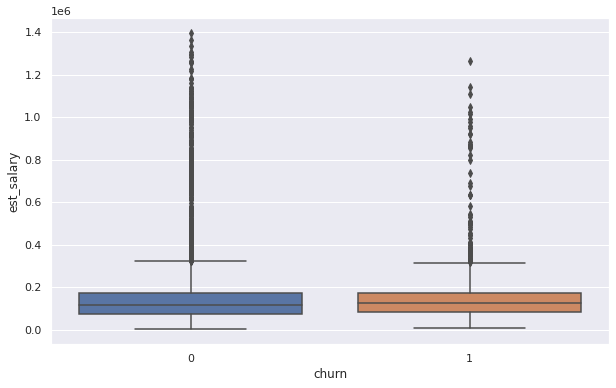

In [ ]:
sns.boxplot(data=test, x="churn", y="est_salary");

Median, 25th and 75th percentiles, whiskers are the same, but both distributions are slightly skewed to the right, plus outliers.

Let us estimate the distributions using the qq-test.

In [ ]:
sampleA = test.loc[test['churn'] == 1]['est_salary'] 
sampleB = test.loc[test['churn'] != 1]['est_salary'] 

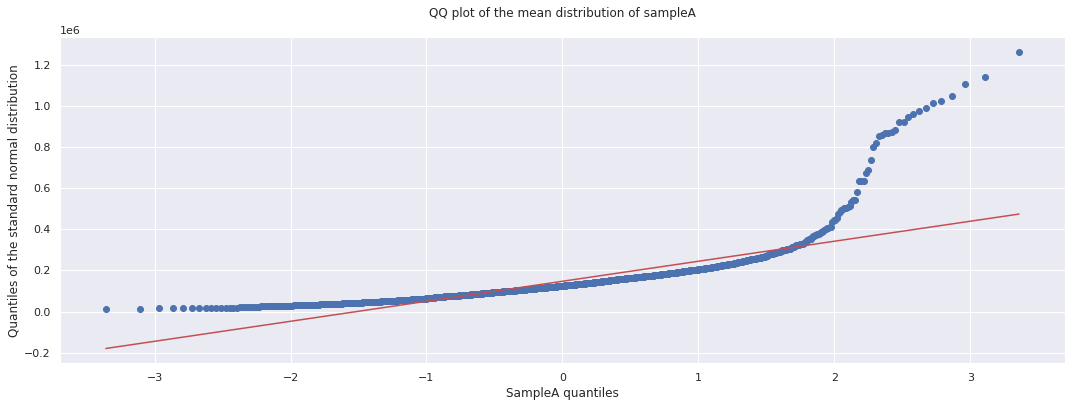

In [ ]:
plt.figure(figsize=(18, 6))

st.probplot(sampleA, dist="norm", plot=pylab)

plt.title('QQ plot of the mean distribution of sampleA', pad=20)
plt.xlabel('SampleA quantiles')
plt.ylabel('Quantiles of the standard normal distribution')
pylab.show()

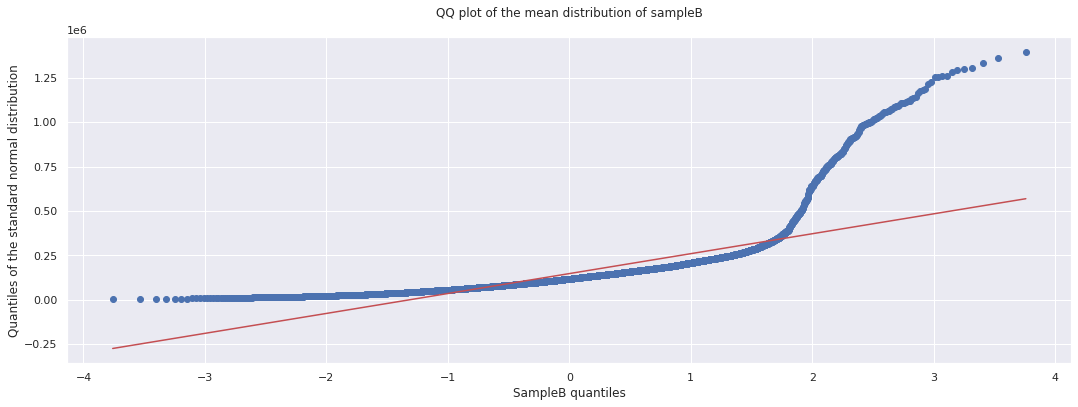

In [ ]:
plt.figure(figsize=(18, 6))

st.probplot(sampleB, dist="norm", plot=pylab)

plt.title('QQ plot of the mean distribution of sampleB', pad=20)
plt.xlabel('SampleB quantiles')
plt.ylabel('Quantiles of the standard normal distribution')
pylab.show()

The distributions are similar, despite the strong quantitative difference between the samples. If the blue dots followed a red line that went up at an angle close to 45 degrees, the data in the variables would be normally distributed. We are dealing with non-normally distributed data.
With a sufficient size of two samples that we have, we can apply the t-test. However, the absence of outliers is required, and we have them. Plus, the variances must be equal. Let's check if they are the same using the Levene test.

In [ ]:
test_leven, p = st.levene(sampleA, sampleB)
print('Statistics=%.3f, p-value=%.3f' % (test_leven, p))
alpha = 0.05
if p < alpha:
    print('We reject the hypothesis of equality of variances')
else:
    print('We accept the hypothesis of equality of variances')

Statistics=7.868, p-value=0.005
We reject the hypothesis of equality of variances


Due to outliers and different variances, the t-test is not appropriate. We will use the non-parametric Mann-Whitney test: it is less demanding on samples, suitable for non-normal distribution.

Let's do a test. Let's formulate hypotheses. Zero, by tradition, conservative. alpha set to 0.05 is the generally accepted threshold value.

    H_0: Average earnings of leaving customers = average earnings of remaining customers
    N_a: Average earnings of leaving customers ≠ average earnings of remaining customers

alpha = 0.05

In [ ]:
results = st.mannwhitneyu(sampleA, sampleB, alternative="two-sided")[1]

alpha = 0.05 

print('mannwhitneyu-test:')
print()
print('p-value =', "{0:.3f}".format(results), 'при alpha = 0.05 ')

if results < alpha:
  print('Rejecting the null hypothesis')
else:
  print('Failed to reject the null hypothesis')

mannwhitneyu-test:

p-value = 0.001 при alpha = 0.05 
Rejecting the null hypothesis


The average salaries of departing and remaining clients differed insignificantly. However, the distribution graph showed that the salaries of one and the second group of clients are concentrated around different values (the salaries of those leaving are higher).
The stattest confirmed our observation. With a small difference in the average, the income of leaving customers is not equal to the income of remaining customers.

### Hypotesis 2

    H_0: Share of leaving customers in the city = Share of remaining customers in the city
    H_a: Share of leaving customers in the city ≠ Share of remaining customers in the city

alpha = 0.05


Since we are examining columns with binary values (0 and 1), we will use the Z-score to test hypotheses.

Determine how many clients are in each sample.

In [ ]:
users_by_city = test\
.pivot_table(index=['churn'], columns=['city'], values = 'userid', aggfunc = 'nunique').reset_index()

users_total = test.groupby('churn')['userid'].nunique()
users_by_city['users_total'] = users_by_city['churn'].apply(lambda x: users_total.loc[x])
users_by_city = users_by_city.set_index('churn')
users_by_city

city,Ростов,Рыбинск,Ярославль,users_total
churn,,,,
0,1153,2213,4744,8106
1,266,416,1089,1770


For the convenience, we will write a function.

In [ ]:
def st_test(part0, part1, total0, total1, alpha):  
    
    p1 = part0 / total0 
    p2 = part1 / total1 
    p_combined = (part0 + part1) / (total0 + total1) 
    difference = p1 - p2 
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/total0 + 1/total1))
    distr = st.norm(0, 1) 
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    return p_value 

Since the test is multiple, we apply the Bonferroni correction.

In [ ]:
pd.options.display.max_colwidth = 150
city_pivot = pd.DataFrame(columns=['Group_1', 'Group_2', 'City', 'p_alpha', 'p_alpha (with Bonferroni correction)', 'p_value', 'Result'])

result_options = ["Rejecting the null hypothesis",
                  "Failed to reject the null hypothesis"]
 
group_1 = 0
current_row = users_by_city.loc[group_1]
group_2 = 1

alpha_cor = .05 / 3

for event_number in range(3):
    curr_event = users_by_city.columns[event_number]
    p_value_result = st_test(current_row[curr_event], 
                                   users_by_city[curr_event][group_2],
                                   current_row['users_total'],
                                   users_by_city['users_total'][group_2],
                                   alpha = 0.05)
    
    new_row = {'Group_1': group_1,
               'Group_2': group_2,
               'City': users_by_city.columns[event_number],
               'p_alpha': 0.05,
               'p_alpha (with Bonferroni correction)': "{0:.4f}".format(alpha_cor),
               'p_value': "{0:.3f}".format(p_value_result),
               'Result': result_options[int(p_value_result >= alpha_cor)]}
    city_pivot = city_pivot.append([new_row])
 
city_pivot.index = range(len(city_pivot))
city_pivot



,Group_1,Group_2,City,p_alpha,p_alpha (with Bonferroni correction),p_value,Result
0,0,1,Ростов,0.05,0.0167,0.382,Failed to reject the null hypothesis
1,0,1,Рыбинск,0.05,0.0167,0.001,Rejecting the null hypothesis
2,0,1,Ярославль,0.05,0.0167,0.020,Failed to reject the null hypothesis


In Rybinsk, statistically significant differences in the shares between leaving and remaining customers are noticeable, in Yaroslavl and Rostov there are none.

## Intermediate conclusions. What metrics affect churn?

Strategic attributes influencing churn in order of decreasing importance, compiled on the basis of the percentage of changes in the central trends of the characteristic:

`equity`, `balance`, `last_activity`, `gender_new`, `products`, `credit_card`, `age`, `score`, `est_salary`.

What segments of departing customers did we see on the chart:

`equity` - customers leave with a rating of 3, 4, 5, 6, 7.

`balance` - a fat tail of those who leave, who keep amounts from 700,000 rubles on their accounts. There are noticeably fewer people remaining after this milestone, and these are valuable clients with money.

`last_activity` - more active leaving than active remaining.

`gender_new` - men leave more often than women.

`products` - leaving customers have 2, 3, 4 products. Moreover, almost all customers who have 4 banking products are going to leave.

`credit_card` - customers with credit cards leave more often than customers without credit cards.

`age` - clients aged 25-35 and 50-60 leave.

`score` - customers leave with a rating of 825-900.

`est_salary` - clients leave with an expected salary of 100,000-200,000 rubles.

`city` - leaving and remaining customers are almost evenly distributed over the three cities. Most of both are in Yaroslavl.

## Segmenting categories based on strategic metrics. Let's prioritize. Let's check the absolute numbers and shares of outgoers in the segments we have identified.

Recall the rating of changes in the Central Feature Trend in the columns between leaving and remaining customers.

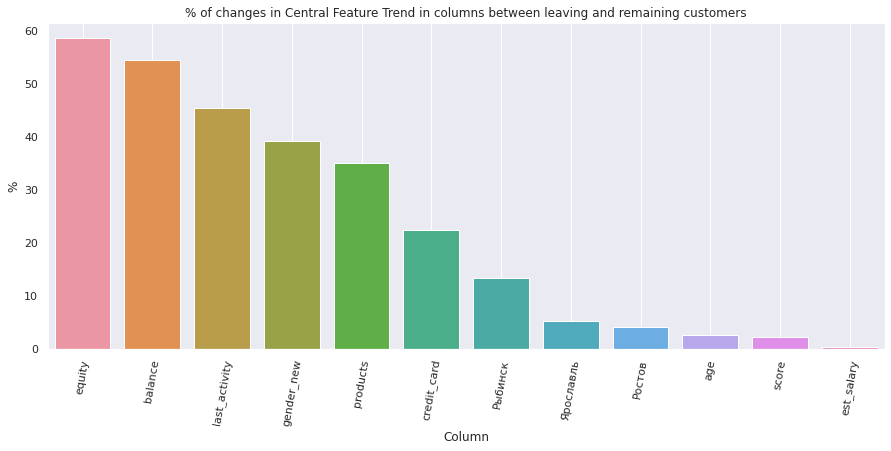

In [ ]:
plt.figure(figsize=(15, 6))

sns.barplot(x='Column', y='% of changes', data=churn_total)

plt.title('% of changes in Central Feature Trend in columns between leaving and remaining customers')
plt.xlabel('Column')
plt.ylabel('%')

plt.grid()
plt.xticks(rotation=80)
plt.show()

### Asset scores

In [ ]:
print('"equity" (3):')
print()
df.loc[df['equity'] == 3]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

"equity" (3):



,index,churn
0,count,"1,542.00"
1,sum,322.00
2,mean,0.21


In [ ]:
print('"equity" (4):')
print()
df.loc[df['equity'] == 4]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

"equity" (4):



,index,churn
0,count,"1,850.00"
1,sum,465.00
2,mean,0.25


In [ ]:
print('"equity" (5):')
print()
df.loc[df['equity'] == 5]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

"equity" (5):



,index,churn
0,count,"1,918.00"
1,sum,577.00
2,mean,0.30


In [ ]:
print('"equity" (6):')
print()
df.loc[df['equity'] == 6]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

"equity" (6):



,index,churn
0,count,161.00
1,sum,58.00
2,mean,0.36


Let's combine segments 4 and 5, especially since they each account for 20% of all bank customers. The remaining segments of the category will not be taken into account, there are small absolute numbers.

In [ ]:
print('"equity" (4 и 5):')
print()
df.loc[((df['equity'] == 4) | (df['equity'] == 5))]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

"equity" (4 и 5):



,index,churn
0,count,"3,768.00"
1,sum,"1,042.00"
2,mean,0.28


### Баланс

In [ ]:
print('Категория "balance" (700000 +):')
print()
df.loc[df['balance'] > 700000]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

Категория "balance" (700000 +):



,index,churn
0,count,"2,901.00"
1,sum,985.00
2,mean,0.34


### Activity

In [ ]:
print('"last_activity" (yes):')
print()
df.loc[df['last_activity'] == 1]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

"last_activity" (yes):



,index,churn
0,count,"5,235.00"
1,sum,"1,280.00"
2,mean,0.24


### Gender

In [ ]:
print('"gender_new" (мужчины):')
print()
df.loc[df['gender_new'] == 1]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

"gender_new" (мужчины):



,index,churn
0,count,"5,005.00"
1,sum,"1,183.00"
2,mean,0.24


### Product

In [ ]:
print('"products" (2):')
print()
df.loc[df['products'] == 2]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

"products" (2):



,index,churn
0,count,"5,107.00"
1,sum,979.00
2,mean,0.19


In [ ]:
print('"products" (3):')
print()
df.loc[df['products'] == 3]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

"products" (3):



,index,churn
0,count,"1,046.00"
1,sum,298.00
2,mean,0.28


In [ ]:
print('"products" (4):')
print()
df.loc[df['products'] == 4]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

"products" (4):



,index,churn
0,count,474.00
1,sum,300.00
2,mean,0.63


Although in the "4 products" segment 63% of customers were about to leave, the segment itself is small. It is much more interesting to work with "2 products" segments. 19 percent leave, but it is almost a thousand people. Let's leave him.

### Credit card


In [ ]:
print('"cradit_card" (yes):')
print()
df.loc[df['credit_card'] == 1]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

"cradit_card" (yes):



,index,churn
0,count,"6,801.00"
1,sum,"1,002.00"
2,mean,0.15


Not a very interesting segment. 15% leaving. Lower than the percentage of exits from the total number of customers.

### Age

In [ ]:
print('"age" (25-35):')
print()
df.loc[((df['age'] >= 25) & (df['age'] <= 35))]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

"age" (25-35):



,index,churn
0,count,"3,100.00"
1,sum,672.00
2,mean,0.22


In [ ]:
print('"age" (50-60):')
print()
df.loc[((df['age'] >= 50) & (df['age'] <= 60))]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

"age" (50-60):



,index,churn
0,count,"1,774.00"
1,sum,469.00
2,mean,0.26


### Score

In [ ]:
print('"score" (825-900):')
print()
df.loc[((df['score'] > 825) & (df['score'] < 900))]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

"score" (825-900):



,index,churn
0,count,"3,834.00"
1,sum,965.00
2,mean,0.25


### Salary

In [ ]:
print('"est_salary" (100000-250000):')
print()
df.loc[((df['est_salary'] >= 100000) & (df['est_salary'] <= 250000))]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

"est_salary" (100000-250000):



,index,churn
0,count,"5,163.00"
1,sum,"1,033.00"
2,mean,0.20


The segment 100,000-200,000 accounted for 20% of those leaving, namely 876 people. We increased the segment to 250,000. The percentage of leaving remained the same, but the number of leaving became more than 1,000 per 5,100 customers in the segment in general.

### Let's selectively compare common features

In [ ]:
print('"balance" (700000 +) + "age" (50-60):')
print()
df.loc[((df['est_salary'] >= 100000) & (((df['age'] >= 50) & (df['age'] <= 60))))]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

"balance" (700000 +) + "age" (50-60):



,index,churn
0,count,968.00
1,sum,257.00
2,mean,0.27


In [ ]:
print('"last_activity" (yes) + "products" (2):')
print()
df.loc[(df['last_activity'] == 1) & (df['products'] == 2)]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

"last_activity" (yes) + "products" (2):



,index,churn
0,count,"2,632.00"
1,sum,732.00
2,mean,0.28


In [ ]:
print('"gender_new" (mailes) + "est_salary" (100000-250000):')
print()
df.loc[((df['gender_new'] == 1) & (((df['est_salary'] >= 100000) & (df['est_salary'] <= 250000))))]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

"gender_new" (mailes) + "est_salary" (100000-250000):



,index,churn
0,count,"2,717.00"
1,sum,663.00
2,mean,0.24


In [ ]:
print('"score" (825-900) + "est_salary" (100000-250000):')
print()
df.loc[((df['score'] > 825) & (df['score'] < 900) & (((df['est_salary'] >= 100000) & (df['est_salary'] <= 250000))))]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

"score" (825-900) + "est_salary" (100000-250000):



,index,churn
0,count,"1,989.00"
1,sum,565.00
2,mean,0.28


In [ ]:
print('"balance" (700000 +) + "est_salary" (100000-250000):')
print()
df.loc[((df['balance'] > 700000) & (((df['est_salary'] >= 100000) & (df['est_salary'] <= 250000))))]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

"balance" (700000 +) + "est_salary" (100000-250000):



,index,churn
0,count,"1,673.00"
1,sum,652.00
2,mean,0.39


39% of clients with a balance of more than 700,000 and a salary of 100,000-250,000! Definitely the first to leave customers with money.

## General conclusions and recommendations

So what have we discovered?

Strong outliers in balance sheet and salaries (maximum salary - 1 million 395 thousand rubles, maximum balance > 119 million rubles).

Men and women are equally distributed as bank customers.

Client core - 35-50 years. The maximum age of the client is 86 years.

Statistics show that the salaries of departing and remaining clients are distributed differently. In Rybinsk, statistically significant differences in the shares between leaving and remaining customers are noticeable, in Yaroslavl and Rostov there are none.

18% of the bank's clients (1820 people) are outflow.

The segments by concentration of outflow customers are as follows:

In [ ]:
print('"balance" (700000 +):')
print()
df.loc[df['balance'] > 700000]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

"balance" (700000 +):



,index,churn
0,count,"2,901.00"
1,sum,985.00
2,mean,0.34


In [ ]:
print('"gender_new" (mailes):')
print()
df.loc[df['gender_new'] == 1]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

"gender_new" (mailes):



,index,churn
0,count,"5,005.00"
1,sum,"1,183.00"
2,mean,0.24


In [ ]:
print('"age" (50-60):')
print()
df.loc[((df['age'] >= 50) & (df['age'] <= 60))]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

"age" (50-60):



,index,churn
0,count,"1,774.00"
1,sum,469.00
2,mean,0.26


In [ ]:
print('"score" (825-900):')
print()
df.loc[((df['score'] > 825) & (df['score'] < 900))]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

"score" (825-900):



,index,churn
0,count,"3,834.00"
1,sum,965.00
2,mean,0.25


In [ ]:
print('"equity" (4 и 5):')
print()
df.loc[((df['equity'] == 4) | (df['equity'] == 5))]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

"equity" (4 и 5):



,index,churn
0,count,"3,768.00"
1,sum,"1,042.00"
2,mean,0.28


In [ ]:
print('"products" (4):')
print()
df.loc[df['products'] == 4]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

"products" (4):



,index,churn
0,count,474.00
1,sum,300.00
2,mean,0.63


Of the joint signs, first of all, we can distinguish:

In [ ]:
print('"balance" (700000 +) + "est_salary" (100000-250000):')
print()
df.loc[((df['balance'] > 700000) & (((df['est_salary'] >= 100000) & (df['est_salary'] <= 250000))))]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

"balance" (700000 +) + "est_salary" (100000-250000):



,index,churn
0,count,"1,673.00"
1,sum,652.00
2,mean,0.39


In [ ]:
print('"score" (825-900) + "est_salary" (100000-250000):')
print()
df.loc[((df['score'] > 825) & (df['score'] < 900) & (((df['est_salary'] >= 100000) & (df['est_salary'] <= 250000))))]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

"score" (825-900) + "est_salary" (100000-250000):



,index,churn
0,count,"1,989.00"
1,sum,565.00
2,mean,0.28


In [ ]:
print('"balance" (700000 +) + "age" (50-60):')
print()
df.loc[((df['est_salary'] >= 100000) & (((df['age'] >= 50) & (df['age'] <= 60))))]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

"balance" (700000 +) + "age" (50-60):



,index,churn
0,count,968.00
1,sum,257.00
2,mean,0.27


Active clients who know what banking products are, use them, and choose the best leave the bank. Those who have money in the account leave.

Recommendations:
- special service for clients with salaries over 100 thousand. This may include bonuses from partner companies, preferential insurance, additional accounts, including foreign currency, interest-free transfers, a loyalty program that emphasizes the elitism of the client; personal manager. A client with money must be respected.
- new products with contributions. Savings deposits, deposits at an increased rate for amounts from 700,000 rubles. Investment products, so that there is where to invest. Special deposits for conservative clients of the outflow category aged 50-60. There is money on the clients' accounts, you need to keep these funds.
- For clients of the outflow category aged 50-60, insurance products, bank cards with a loyalty program, for example, from city pharmacy chains, or a discount when paying for city public transport with a bank card.
- special mortgage programs for clients aged 25-35. Even if they leave, they will still pay according to the account in this bank.
- special loan programs for clients with high credit scoring, this category is also a perfect one.